In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="2"


In [3]:
# there are two environments(debug and prod). From where you want to fetch the code and data? 
DEBUG=False

In [4]:
%run ./nb_core/root_dirs.ipynb
setup_syspath_disentangle(DEBUG)
%run ./nb_core/disentangle_imports.ipynb

DATA_ROOT:	 /group/jug/ashesh/data/
CODE_ROOT:	 /home/ashesh.ashesh/


In [5]:
# 'stats_'+'_'.join(ckpt_dir.split('/')[-4:]) + '.pkl'

In [6]:
ckpt_dir = "/home/ashesh.ashesh/training/disentangle/2311/D16-M3-S0-L0/115"
# 211/D3-M3-S0-L0/0
# 2210/D3-M3-S0-L0/128
# 2210/D3-M3-S0-L0/129

In [7]:
# !ls /home/ubuntu/ashesh/training/disentangle/2209/D3-M9-S0-L0/1

In [8]:
dtype = int(ckpt_dir.split('/')[-2].split('-')[0][1:])

In [9]:
dtype

16

In [10]:
if DEBUG:
    if dtype == DataType.CustomSinosoid:
        data_dir = f'{DATA_ROOT}/sinosoid/'
    elif dtype == DataType.OptiMEM100_014:
        data_dir = f'{DATA_ROOT}/microscopy/'
else:
    if dtype in [DataType.CustomSinosoid, DataType.CustomSinosoidThreeCurve]:
        data_dir = f'{DATA_ROOT}/sinosoid_without_test/sinosoid/'
    elif dtype == DataType.OptiMEM100_014:
        data_dir = f'{DATA_ROOT}/microscopy/'
    elif dtype == DataType.Prevedel_EMBL:
        data_dir = f'{DATA_ROOT}/Prevedel_EMBL/PKG_3P_dualcolor_stacks/NoAverage_NoRegistration/'
    elif dtype == DataType.AllenCellMito:
        data_dir = f'{DATA_ROOT}/allencell/2017_03_08_Struct_First_Pass_Seg/AICS-11/'
    elif dtype == DataType.SeparateTiffData:
        data_dir = f'{DATA_ROOT}/ventura_gigascience'
    elif dtype == DataType.SemiSupBloodVesselsEMBL:
        data_dir = f'{DATA_ROOT}/EMBL_halfsupervised/Demixing_3P'
    elif dtype == DataType.Pavia2VanillaSplitting:
        data_dir = f'{DATA_ROOT}/pavia2'
    elif dtype == DataType.ExpansionMicroscopyMitoTub:
        data_dir = f'{DATA_ROOT}/expansion_microscopy_Nick/'
    elif dtype == DataType.ShroffMitoEr:
        data_dir = f'{DATA_ROOT}/shrofflab/'
    elif dtype == DataType.HTIba1Ki67:
        data_dir = f'{DATA_ROOT}/Stefania/20230327_Ki67_and_Iba1_trainingdata/'
    elif dtype == DataType.BioSR_MRC:
        data_dir = f'{DATA_ROOT}/BioSR/'
        
#     2720*2720: microscopy dataset.

image_size_for_grid_centers = 64
mmse_count = 1
custom_image_size = 128



batch_size = 8
num_workers = 4
COMPUTE_LOSS = False
use_deterministic_grid = None
threshold = None # 0.02
compute_kl_loss = False
evaluate_train = False# inspect training performance
eval_datasplit_type = DataSplitType.Test
val_repeat_factor = None
psnr_type = 'range_invariant' #'simple', 'range_invariant'

In [11]:
%run ./nb_core/config_loader.ipynb

data:
  background_quantile: 0.0
  ch1_fname: Microtubules/GT_all.mrc
  ch2_fname: ER/GT_all.mrc
  clip_background_noise_to_zero: false
  clip_percentile: 0.995
  data_type: 16
  deterministic_grid: true
  grid_size: 1
  image_size: 128
  input_is_sum: false
  multiscale_lowres_count: null
  normalized_input: true
  padding_mode: reflect
  padding_value: null
  randomized_channels: false
  sampler_type: 0
  skip_normalization_using_mean: false
  target_separate_normalization: false
  train_aug_rotate: false
  trainig_datausage_fraction: 1
  training_validtarget_fraction: 0.01
  use_one_mu_std: true
  validation_datausage_fraction: 0.08
  validtarget_random_fraction: 1.0
  variable_intensity_aug: true
  variable_intensity_aug_quantile: 0.5
  variable_intensity_aug_scale_factor: 3
  variable_intensity_aug_sigma: 1
datadir: /group/jug/ashesh/data/BioSR/
exptname: 2311/D16-M3-S0-L0/115
git:
  branch: pre_trained
  changedFiles: []
  latest_commit: a84f2d4d0504647e951e069727dba012b3a6b26f
 

In [12]:
# config.model.decoder

In [17]:
from disentangle.core.sampler_type import SamplerType
from disentangle.core.loss_type import LossType
from disentangle.data_loader.ht_iba1_ki67_rawdata_loader import SubDsetType
# from disentangle.core.lowres_merge_type import LowresMergeType


with config.unlocked():
    config.model.skip_nboundary_pixels_from_loss = None
    config.data.variable_intensity_bright_spot_count = 1
    
    if config.model.model_type == ModelType.UNet and 'n_levels' not in config.model:
        config.model.n_levels = 4
    if config.data.sampler_type == SamplerType.NeighborSampler:
        config.data.sampler_type = SamplerType.DefaultSampler
        config.loss.loss_type = LossType.Elbo
        config.data.grid_size = config.data.image_size
    if 'ch1_fpath_list' in config.data:
        config.data.ch1_fpath_list = config.data.ch1_fpath_list[:1]
        config.data.mix_fpath_list = config.data.mix_fpath_list[:1]
    if config.data.data_type == DataType.Pavia2VanillaSplitting:
        if 'channel_2_downscale_factor' not in config.data:
            config.data.channel_2_downscale_factor = 1
    if config.model.model_type == ModelType.UNet and 'init_channel_count' not in config.model:
        config.model.init_channel_count = 64
    
    if 'skip_receptive_field_loss_tokens' not in config.loss:
        config.loss.skip_receptive_field_loss_tokens = []
    
    if dtype == DataType.HTIba1Ki67:
        config.data.subdset_type = SubDsetType.Iba1Ki64
        config.data.empty_patch_replacement_enabled = False
    
    if 'lowres_merge_type' not in config.model.encoder:
        config.model.encoder.lowres_merge_type = 0

In [18]:
%run ./nb_core/disentangle_setup.ipynb


<class 'disentangle.data_loader.multi_channel_determ_tiff_dloader.MultiChDeterministicTiffDloader'>
Loading from /group/jug/ashesh/data//BioSR/ Channel1: /group/jug/ashesh/data//BioSR/Microtubules/GT_all.mrc,/group/jug/ashesh/data//BioSR/ER/GT_all.mrc, Mode:Train
[IndexSwitcher] Target Indices: [0,0]. Index=0 has shape [:673,:673].  Available data: 45
[MultiChDeterministicTiffDloader] Sz:128 Train:1 N:45 NumPatchPerN:49 NormInp:True SingleNorm:True Rot:False RandCrop:False Q:0.995 SummedInput:False ReplaceWithRandSample:False BckQ:0.0 VarIntAug:3-1-0.5-1
Loading from /group/jug/ashesh/data//BioSR/ Channel1: /group/jug/ashesh/data//BioSR/Microtubules/GT_all.mrc,/group/jug/ashesh/data//BioSR/ER/GT_all.mrc, Mode:Test
[MultiChDeterministicTiffDloader] Sz:128 Train:0 N:5 NumPatchPerN:49 NormInp:True SingleNorm:True Rot:False RandCrop:False Q:0.995 SummedInput:False ReplaceWithRandSample:False BckQ:0.0

config.pkl
[3, 3] [1, 1]
[3, 3] [1, 1]
[BottomUpLayer] McEnabled:0 
[3, 3] [1, 1]
[Botto

In [19]:
len(train_dset)

2205

In [20]:
if config.data.multiscale_lowres_count is not None and custom_image_size is not None:
    model.reset_for_different_output_size(custom_image_size)

In [21]:
# if config.model.model_type not in [ModelType.UNet, ModelType.BraveNet]:
#     with torch.no_grad():
#         inp, tar = val_dset[0][:2]
#         out, td_data = model(torch.Tensor(inp[None]).cuda())
#         print(td_data['z'][-1].shape)
#         print(out.shape)

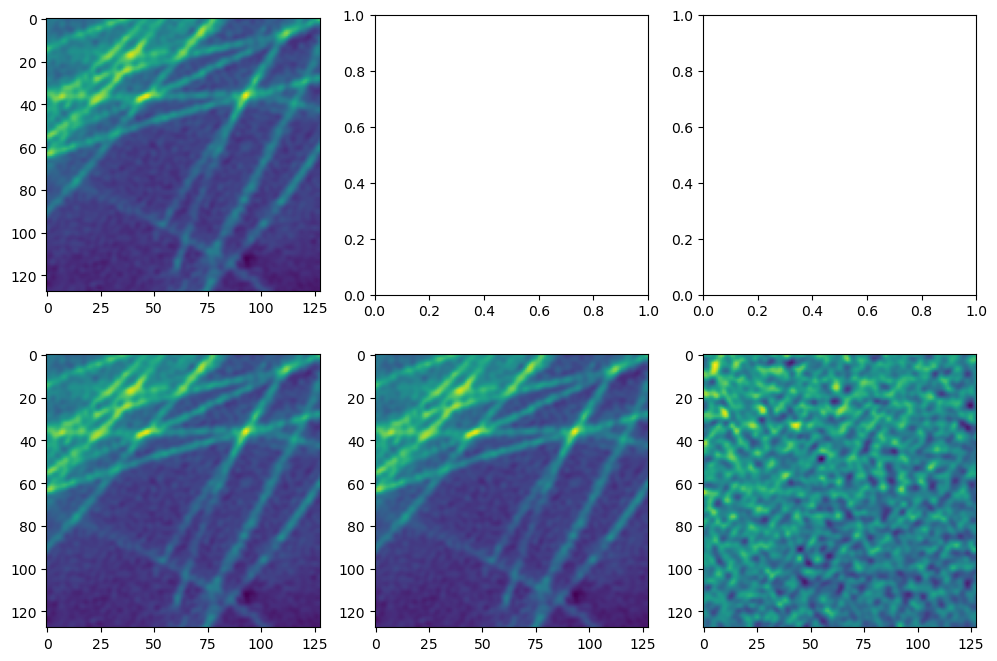

In [22]:
idx = np.random.randint(len(val_dset))
inp_tmp, tar_tmp, *_ = val_dset[idx]
ncols = max(len(inp_tmp),3)
nrows = 2
_,ax = plt.subplots(figsize=(4*ncols,4*nrows),ncols=ncols,nrows=nrows)
for i in range(len(inp_tmp)):
    ax[0,i].imshow(inp_tmp[i])

ax[1,0].imshow(tar_tmp[0]+tar_tmp[1])
ax[1,1].imshow(tar_tmp[0])
ax[1,2].imshow(tar_tmp[1])


In [23]:
# from typing import Tuple

# import numpy as np
# import torch
# from torch.utils.data import DataLoader
# from tqdm import tqdm

# from disentangle.core.loss_type import LossType
# from disentangle.core.model_type import ModelType
# from disentangle.metrics.running_psnr import RunningPSNR


# def get_mmse_prediction(model, dset, inp_idx, mmse_count, padded_size: int, prediction_size: int, batch_size=16,
#                         track_progress: bool = True) -> \
#         Tuple[
#             torch.Tensor, torch.Tensor]:
#     """
#     The work here is to simply get the MMSE prediction for a specific input.
#     Args:
#         model:
#         dset: the dataset.
#         inp_idx: Input index of the dataset for which MMSE prediction needs to be computed.
#         mmse_count: Averaging over how many times?
#         padded_size: After padding what should be size of the input to the model.
#         prediction_size: How much should be kept for prediction. Ex: padded_size=96 and prediction_size=64. 16 pixesls
#                         are padded on all sides in this case.
#         batch_size: Used for speeding up the computation.

#     Returns:
#         MMSE prediction and the target. Both are in normalized state.

#     """
#     assert padded_size >= prediction_size
#     old_img_sz = dset.get_img_sz()
#     dset.set_img_sz(padded_size)

#     padN = (padded_size - prediction_size) // 2

#     with torch.no_grad():
#         inp, tar = dset[inp_idx]
#         inp = torch.Tensor(inp[None])
#         tar = torch.Tensor(tar[None])
#         inp = inp.repeat(batch_size, 1, 1, 1)
#         tar = tar.repeat(batch_size, 1, 1, 1)
#         inp = inp.cuda()
#         tar = tar.cuda()
#         recon_img_list = []
#         range_mmse = range(0, mmse_count, batch_size)
#         if track_progress:
#             range_mmse = tqdm(range_mmse)

#         for i in range_mmse:
#             end = min(i + batch_size, mmse_count) - i
#             x_normalized = model.normalize_input(inp[:end])
#             tar_normalized = model.normalize_target(tar[:end])
#             recon_normalized, td_data = model(x_normalized)
#             recon_img = model.likelihood.get_mean_lv(recon_normalized)[0]
#             if padN > 0:
#                 tar_normalized = tar_normalized[:, :, padN:-padN, padN:-padN]
#                 recon_normalized = recon_normalized[:, :, padN:-padN, padN:-padN]
#                 recon_img = recon_img[:, :, padN:-padN, padN:-padN]

#             assert tar_normalized.shape[-1] == prediction_size
#             assert tar_normalized.shape[-2] == prediction_size
#             assert tar_normalized.shape[-2:] == recon_normalized.shape[-2:]
#             recon_img_list.append(recon_img.cpu())
#         mmse_img = torch.mean(torch.cat(recon_img_list, dim=0), dim=0)[None]

#     dset.set_img_sz(old_img_sz)
#     return mmse_img, tar_normalized.cpu()


# def get_dset_predictions(model, dset, batch_size, model_type=None, mmse_count=1, num_workers=4):
#     dloader = DataLoader(dset, pin_memory=False, num_workers=num_workers, shuffle=False, batch_size=batch_size)
#     predictions = []
#     losses = []
#     logvar_arr = []
#     patch_psnr_ch1 = RunningPSNR()
#     patch_psnr_ch2 = RunningPSNR()
#     with torch.no_grad():
#         for batch in tqdm(dloader):
#             inp, tar = batch[:2]
#             inp = inp.cuda()
#             tar = tar.cuda()

#             recon_img_list = []
#             for mmse_idx in range(mmse_count):
#                 if model_type in [ModelType.UNet, ModelType.BraveNet]:
#                     x_normalized = model.normalize_input(inp)
#                     tar_normalized = model.normalize_target(tar)

#                     recon_normalized = model(x_normalized)
#                     if model_type == ModelType.BraveNet:
#                         recon_normalized = recon_normalized[0]

#                     imgs = recon_normalized
#                     rec_loss = model.get_reconstruction_loss(recon_normalized, tar_normalized)

#                     if mmse_idx == 0:
#                         logvar_arr.append(np.array([-1]))
#                         losses.append(rec_loss.cpu().numpy())

#                 else:
#                     if model_type == ModelType.LadderVaeStitch:
#                         x_normalized = model.normalize_input(inp)
#                         tar_normalized = model.normalize_target(tar)

#                         recon_normalized, td_data = model(x_normalized)
#                         offset = model.compute_offset(td_data['z'])
#                         rec_loss, imgs = model.get_reconstruction_loss(recon_normalized,
#                                                                        tar_normalized,
#                                                                        offset,
#                                                                        return_predicted_img=True)
#                     elif model_type == ModelType.LadderVaeSemiSupervised:
#                         x_normalized = model.normalize_input(inp, torch.zeros_like(tar[:, 0, 0, 0], dtype=torch.int64))
#                         tar_normalized = model.normalize_target(tar, torch.zeros_like(tar[:, 0, 0, 0],
#                                                                                       dtype=torch.int64))

#                         recon_normalized, td_data = model(x_normalized)
#                         rec_loss, imgs = model.get_reconstruction_loss(recon_normalized,
#                                                                        x_normalized,
#                                                                        tar_normalized,
#                                                                        return_predicted_img=True)

#                     elif model_type == ModelType.LadderVaeMixedRecons:
#                         x_normalized = model.normalize_input(inp)
#                         tar_normalized = model.normalize_target(tar)

#                         recon_normalized, td_data = model(x_normalized)
#                         rec_loss, imgs = model.get_reconstruction_loss(recon_normalized,
#                                                                        x_normalized,
#                                                                        tar_normalized,
#                                                                        return_predicted_img=True)
#                     elif model_type in [
#                             ModelType.LadderVaeMultiDataSet, ModelType.LadderVaeMultiDatasetMultiBranch,
#                             ModelType.LadderVaeMultiDatasetMultiOptim
#                     ]:
#                         dset_idx, loss_idx = batch[2:]
#                         dset_idx = dset_idx.cuda()
#                         loss_idx = loss_idx.cuda()

#                         x_normalized = model.normalize_input(inp)
#                         tar_normalized = model.normalize_target(tar, dset_idx)
#                         if model_type in [
#                                 ModelType.LadderVaeMultiDatasetMultiBranch, ModelType.LadderVaeMultiDatasetMultiOptim
#                         ]:
#                             mask_mixrecons = loss_idx == LossType.ElboMixedReconstruction
#                             mask_2ch = loss_idx == LossType.Elbo
#                             assert mask_2ch.sum() in [0, len(x_normalized)]
#                             assert mask_mixrecons.sum() in [0, len(x_normalized)]
#                             loss_idx_type = LossType.Elbo if mask_2ch.sum() == len(
#                                 x_normalized) else LossType.ElboMixedReconstruction
#                             recon_normalized, _ = model(x_normalized, loss_idx_type)
#                         else:
#                             recon_normalized, _ = model(x_normalized)
#                         rec_loss, imgs = model.get_reconstruction_loss(recon_normalized,
#                                                                        tar_normalized,
#                                                                        dset_idx,
#                                                                        loss_idx,
#                                                                        return_predicted_img=True)

#                     elif model_type == ModelType.LVaeDeepEncoderIntensityAug:
#                         x_normalized = model.normalize_input(inp)
#                         alpha = torch.Tensor([0.5] * len(x_normalized)).to(x_normalized.device)
#                         tar_normalized = model.normalize_target(tar, batch=(None, None, alpha))
#                         out_l1, out_l2, td_data = model(x_normalized)

#                         rec_loss, imgs = model.get_reconstruction_loss(out_l1,
#                                                                        out_l2,
#                                                                        tar_normalized,
#                                                                        return_predicted_img=True)
#                         imgs = torch.cat(imgs, dim=1)
#                         rec_loss = {'loss': rec_loss}
#                     else:
#                         x_normalized = model.normalize_input(inp)
#                         tar_normalized = model.normalize_target(tar)

#                         recon_normalized, _ = model(x_normalized)
#                         print(recon_normalized.shape, tar_normalized.shape, x_normalized.shape)
#                         rec_loss, imgs = model.get_reconstruction_loss(recon_normalized,
#                                                                        tar_normalized,
#                                                                        x_normalized,
#                                                                        return_predicted_img=True)

#                     if mmse_idx == 0:
#                         q_dic = model.likelihood.distr_params(recon_normalized) if model.likelihood is not None else {
#                             'logvar': None
#                         }
#                         if q_dic['logvar'] is not None:
#                             logvar_arr.append(q_dic['logvar'].cpu().numpy())
#                         else:
#                             logvar_arr.append(np.array([-1]))

#                         try:
#                             losses.append(rec_loss['loss'].cpu().numpy())
#                         except:
#                             losses.append(rec_loss['loss'])

#                 patch_psnr_ch1.update(imgs[:, 0], tar_normalized[:, 0])
#                 patch_psnr_ch2.update(imgs[:, 1], tar_normalized[:, 1])
#                 recon_img_list.append(imgs.cpu()[None])

#             mmse_imgs = torch.mean(torch.cat(recon_img_list, dim=0), dim=0)
#             predictions.append(mmse_imgs.cpu().numpy())

#     psnrl1 = patch_psnr_ch1.get()
#     psnrl2 = patch_psnr_ch2.get()
#     return np.concatenate(predictions, axis=0), np.array(losses), np.concatenate(logvar_arr), (psnrl1, psnrl2)


In [24]:
model.data_mean['input'].shape

torch.Size([1, 1, 1, 1])

In [25]:
from disentangle.analysis.stitch_prediction import stitch_predictions
from disentangle.analysis.mmse_prediction import get_dset_predictions
# from disentangle.analysis.stitch_prediction import get_predictions as get_dset_predictions

pred_tiled, rec_loss, logvar, patch_psnr_tuple = get_dset_predictions(model, val_dset,batch_size,
                                               num_workers=num_workers,
                                               mmse_count=mmse_count,
                                                model_type = config.model.model_type,
                                              )
tmp = np.round([x.item() for x in patch_psnr_tuple],2)
print('Patch wise PSNR, as computed during training', tmp,np.mean(tmp) )

100%|██████████| 31/31 [00:03<00:00,  8.95it/s]

Patch wise PSNR, as computed during training [21.53 21.53] 21.53


In [26]:
np.mean(rec_loss)

0.11035858

In [27]:
# Patch wise PSNR, as computed during training [ 4.71 23.01] 13.860000000000001


In [28]:
len(val_dset)

245

In [29]:
idx_list = np.where(logvar.squeeze() < -6)[0]
if len(idx_list) > 0:
    plt.imshow(val_dset[idx_list[0]][1][1])

In [30]:
len(val_dset)

245

/home/ashesh.ashesh/mambaforge/envs/usplit/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ashesh.ashesh/mambaforge/envs/usplit/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

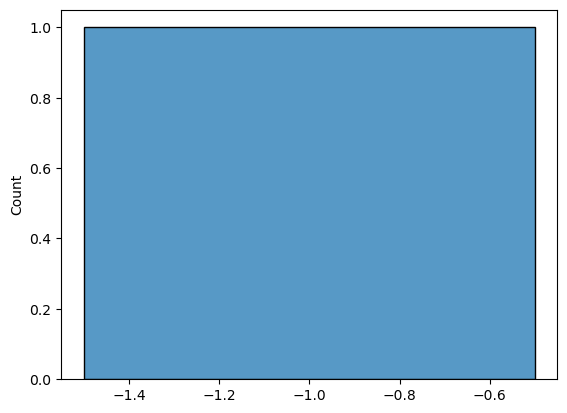

In [31]:
import seaborn as sns
sns.histplot(logvar[::50].squeeze().reshape(-1,))

In [32]:
print(np.quantile(rec_loss, [0,0.01,0.5, 0.9,0.99,0.999,1]).round(2))

[0.03 0.04 0.1  0.15 0.2  0.21 0.21]


In [33]:
if pred_tiled.shape[-1] != val_dset.get_img_sz():
    pad = (val_dset.get_img_sz() - pred_tiled.shape[-1] )//2
    pred_tiled = np.pad(pred_tiled, ((0,0),(0,0),(pad,pad),(pad,pad)))

pred = stitch_predictions(pred_tiled,val_dset, smoothening_pixelcount=0)

In [34]:
pred_tiled.shape

(245, 2, 128, 128)

In [35]:
pred.shape

(5, 1004, 1004, 2)

In [36]:
pred[np.isnan(pred)] = 0

In [37]:
def print_ignored_pixels():
    ignored_pixels = 1
    while(pred[0,-ignored_pixels:,-ignored_pixels:,].std() ==0):
        ignored_pixels+=1
    ignored_pixels-=1
    print(f'In {pred.shape}, last {ignored_pixels} many rows and columns are all zero.')
    return ignored_pixels

actual_ignored_pixels = print_ignored_pixels()

In (5, 1004, 1004, 2), last 108 many rows and columns are all zero.


## Ignore the pixels which are present in the last few rows and columns. 
1. They don't come in the batches. So, in prediction, they are simply zeros. So they are being are ignored right now. 
2. For the border pixels which are on the top and the left, overlapping yields worse performance. This is becuase, there is nothing to overlap on one side. So, they are essentially zero padded. This makes the performance worse. 

In [38]:
actual_ignored_pixels

108

In [39]:
ignored_last_pixels = 32 if config.data.data_type in [DataType.OptiMEM100_014,
                                                      DataType.SemiSupBloodVesselsEMBL, 
                                                      DataType.Pavia2VanillaSplitting,
                                                      DataType.ExpansionMicroscopyMitoTub,
                                                      DataType.ShroffMitoEr,
                                                      DataType.HTIba1Ki67] else 0

if config.data.data_type == DataType.BioSR_MRC:
    ignored_last_pixels = 108
    
ignore_first_pixels = 0

assert actual_ignored_pixels <= ignored_last_pixels, f'Set ignored_last_pixels={actual_ignored_pixels}'
print(ignored_last_pixels)

108


In [40]:
tar = val_dset._data
def ignore_pixels(arr):
    if ignore_first_pixels:
        arr = arr[:,ignore_first_pixels:,ignore_first_pixels:]
    if ignored_last_pixels:
        arr = arr[:,:-ignored_last_pixels,:-ignored_last_pixels]
    return arr

pred = ignore_pixels(pred)
tar = ignore_pixels(tar)


In [41]:
# from disentangle.analysis.plot_utils import *
# def add_pixel_kde(ax,
#                   rect: List[float],
#                   data1: np.ndarray,
#                   data2: Union[np.ndarray, None],
#                   min_labelsize: int,
#                   color1='r',
#                   color2='black',
#                   color_xtick='white',
#                   label1='Target',
#                   label2='Predicted'):
#     """
#     Adds KDE (density plot) of data1(eg: target) and data2(ex: predicted) image pixel values as an inset
#     """
#     inset_ax = add_subplot_axes(ax, rect, facecolor="None", min_labelsize=min_labelsize)
    
#     inset_ax.tick_params(axis='x', colors=color_xtick)

#     sns.kdeplot(data=data1.reshape(-1, ), ax=inset_ax, color=color1, label=label1)
#     if data2 is not None:
#         sns.kdeplot(data=data2.reshape(-1, ), ax=inset_ax, color=color2, label=label2)
#     inset_ax.set_xlim(left=0)
#     xticks = inset_ax.get_xticks()
#     # inset_ax.set_xticks([xticks[0], xticks[-1]])
#     inset_ax.set_xticks([])
#     clean_for_xaxis_plot(inset_ax)


# ch1_pred_unnorm = pred[...,0]*sep_std[...,0].cpu().numpy() + sep_mean[...,0].cpu().numpy()
# ch2_pred_unnorm = pred[...,1]*sep_std[...,1].cpu().numpy() + sep_mean[...,1].cpu().numpy()

# inset_rect=[0.1,0.1,0.4,0.2]
# inset_min_labelsize=10
# color_ch_list=['goldenrod','cyan']

# _,ax = plt.subplots(figsize=(15,10),ncols=3,nrows=2)
# idx = 8
# pred1_crop  = ch1_pred_unnorm[idx,1116:1372,1064:1320].copy()
# pred2_crop  = ch2_pred_unnorm[idx,1116:1372,1064:1320].copy()
# pred1_crop[pred1_crop<0] = 0
# pred2_crop[pred2_crop<0] = 0

# tar1_crop   =  tar[idx,1116:1372,1064:1320,0]
# tar2_crop   =  tar[idx,1116:1372,1064:1320,1]

# ax[0,0].imshow(tar1_crop+tar2_crop)
# ax[0,1].imshow(tar1_crop)
# ax[0,2].imshow(tar2_crop)

# ax[1,0].imshow(pred1_crop+pred2_crop)
# ax[1,1].imshow(pred1_crop)
# ax[1,2].imshow(pred2_crop)
# clean_ax(ax)
# add_pixel_kde(ax[0,0], inset_rect, 
#               tar1_crop, 
#               tar2_crop, 
#               inset_min_labelsize,
#                 label1='Ch1', label2='Ch2', color1=color_ch_list[0], color2=color_ch_list[1])

# add_pixel_kde(ax[1,1], inset_rect, 
#               pred1_crop, 
#               tar1_crop, 
#               inset_min_labelsize,
#                 label1='Ch1', label2='Ch2', color1='red', color2=color_ch_list[0])
# add_pixel_kde(ax[1,2], inset_rect, 
#               pred2_crop, 
#               tar2_crop, 
#               inset_min_labelsize,
#                 label1='Ch1', label2='Ch2', color1='red', color2=color_ch_list[1])

In [42]:
from skimage.metrics import structural_similarity

def _avg_psnr(target, prediction, psnr_fn):
    output = np.mean([psnr_fn(target[i:i + 1], prediction[i:i + 1]).item() for i in range(len(prediction))])
    return round(output, 2)


def avg_range_inv_psnr(target, prediction):
    return _avg_psnr(target, prediction, RangeInvariantPsnr)


def avg_psnr(target, prediction):
    return _avg_psnr(target, prediction, PSNR)


def compute_masked_psnr(mask, tar1, tar2, pred1, pred2):
    mask = mask.astype(bool)
    mask = mask[..., 0]
    tmp_tar1 = tar1[mask].reshape((len(tar1), -1, 1))
    tmp_pred1 = pred1[mask].reshape((len(tar1), -1, 1))
    tmp_tar2 = tar2[mask].reshape((len(tar2), -1, 1))
    tmp_pred2 = pred2[mask].reshape((len(tar2), -1, 1))
    psnr1 = avg_range_inv_psnr(tmp_tar1, tmp_pred1)
    psnr2 = avg_range_inv_psnr(tmp_tar2, tmp_pred2)
    return psnr1, psnr2

def avg_ssim(target, prediction):
    ssim = [structural_similarity(target[i],prediction[i], data_range=(target[i].max() - target[i].min())) for i in range(len(target))]
    return np.mean(ssim),np.std(ssim)

In [43]:
# config.data

In [44]:
sep_mean, sep_std = model.data_mean, model.data_std
if isinstance(sep_mean, dict):
    sep_mean = sep_mean['target']
    sep_std = sep_std['target']
    
sep_mean = sep_mean.squeeze()[None,None,None]
sep_std = sep_std.squeeze()[None,None,None]

tar_normalized = (tar - sep_mean.cpu().numpy())/sep_std.cpu().numpy()
tar1 =tar_normalized[...,0]
tar2 =tar_normalized[...,1]

In [45]:
q_vals = [0.01, 0.1,0.5,0.9,0.95, 0.99,1]
print('Nuc:', np.quantile(tar_normalized[...,0], q_vals).round(2))
print('Tub:', np.quantile(tar_normalized[...,1], q_vals).round(2))

Nuc: [-0.97 -0.88  0.16  1.86  2.48  3.84  4.63]
Tub: [-0.8  -0.78 -0.38  1.68  2.69  4.55  4.63]


In [46]:
print('Nuc:', np.quantile(tar[...,0], q_vals))
print('Tub:', np.quantile(tar[...,1], q_vals))

Nuc: [   41.   597.  6823. 16919. 20660. 28746. 33470.]
Tub: [ 1062.  1184.  3600. 15881. 21878. 32985. 33470.]


/home/ashesh.ashesh/mambaforge/envs/usplit/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ashesh.ashesh/mambaforge/envs/usplit/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ashesh.ashesh/mambaforge/envs/usplit/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ashesh.ashesh/mambaforge/envs/usplit/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

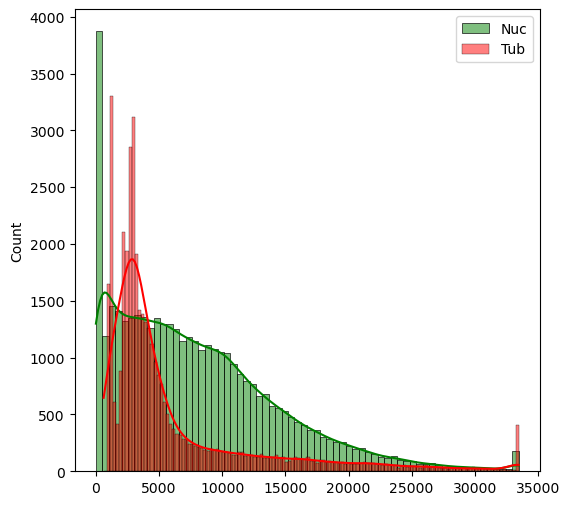

In [47]:
_,ax = plt.subplots(figsize=(6,6))
# sns.histplot(tar[:,...,0].reshape(-1,), color='g', label='Nuc')
# sns.histplot(tar[:,...,1].reshape(-1,), color='r', label='Tub')

sns.histplot(tar[:,::10,::10,0].reshape(-1,), color='g', label='Nuc', kde=True)
sns.histplot(tar[:,::10,::10,1].reshape(-1,), color='r', label='Tub', kde=True)
ax.legend()

In [48]:
# from disentangle.data_loader.schroff_rawdata_loader import mito_channel_fnames
# from disentangle.core.tiff_reader import load_tiff
# import seaborn as sns

# fpaths = [os.path.join(datapath, x) for x in mito_channel_fnames()]
# fpath = fpaths[0]
# print(fpath)
# img = load_tiff(fpaths[0])
# temp = img.copy()
# sns.histplot(temp[:,:,::10,::10].reshape(-1,))
# plt.hist(temp[:,:,::10,::10].reshape(-1,),bins=100)

1


(5, 896, 896, 2)

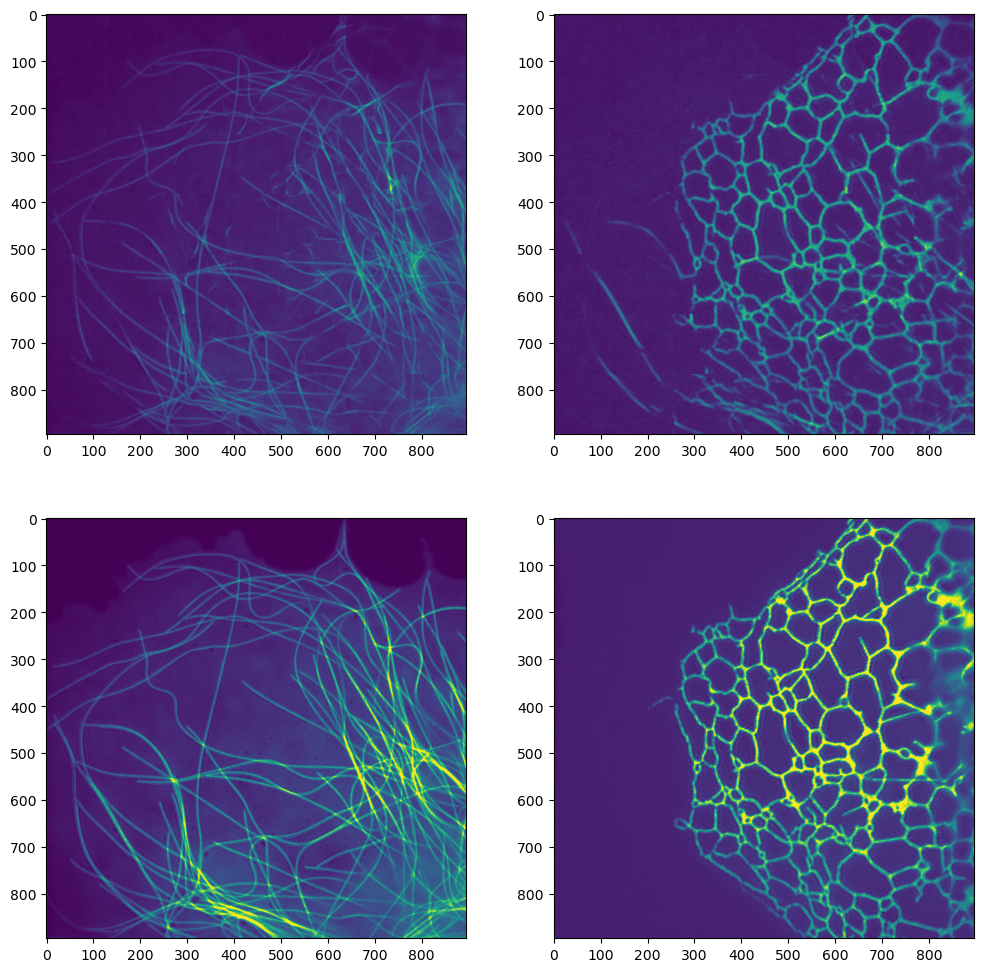

In [49]:
_,ax = plt.subplots(figsize=(12,12),ncols=2,nrows=2)
idx = np.random.randint(len(pred))
print(idx)
ax[0,0].imshow(pred[idx,:,:,0])
ax[0,1].imshow(pred[idx,:,:,1])
ax[1,0].imshow(tar1[idx,:,:])
ax[1,1].imshow(tar2[idx,:,:])

pred.shape

In [50]:
# pred is already normalized. no need to do it. 
pred1, pred2 = pred[...,0].astype(np.float32), pred[...,1].astype(np.float32)
pred_inp = (pred1 + pred2)/2

In [51]:
# ch1_pred_unnorm = pred[...,0]*sep_std[...,0].cpu().numpy() + sep_mean[...,0].cpu().numpy()
# ch2_pred_unnorm = pred[...,1]*sep_std[...,1].cpu().numpy() + sep_mean[...,1].cpu().numpy()
ch1_pred_unnorm =   pred[...,0]*sep_std[...,0].cpu().numpy() + sep_mean[...,0].cpu().numpy()
ch2_pred_unnorm =   pred[...,1]*sep_std[...,1].cpu().numpy() + sep_mean[...,1].cpu().numpy()

In [52]:
import torch.nn as nn
import torch
from disentangle.nets.lvae_layers import (BottomUpDeterministicResBlock, BottomUpLayer, TopDownDeterministicResBlock,
                                          TopDownLayer)

class SingleBottomUpLayer(BottomUpLayer):
    def forward(self, x):
        x, _ = super().forward(x)
        return x

    
    
class TextureEncoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.nonlin = nn.LeakyReLU
        self.num_blocks_per_layer = 1
        self.num_hierarchy_levels = 2
        self.color_ch =1
        self.encoder_n_filters = 16
        self.encoder_res_block_kernel = 3
        self.encoder_res_block_skip_padding = True
        self.encoder_dropout = 0.0
        self.res_block_type = 'bacdbacd'
        self.batchnorm = True
        self.gated = False
        modules = [
            nn.Conv2d(self.color_ch,
                        self.encoder_n_filters,
                        self.encoder_res_block_kernel,
                        padding=0 if self.encoder_res_block_skip_padding else self.encoder_res_block_kernel // 2,
                        stride=1),
            self.nonlin()
        ]
        for _ in range(self.num_hierarchy_levels):
            modules.append(
                SingleBottomUpLayer(n_res_blocks=self.num_blocks_per_layer,
                              n_filters=self.encoder_n_filters,
                              downsampling_steps=1,
                              nonlin=self.nonlin,
                              batchnorm=self.batchnorm,
                              dropout=self.encoder_dropout,
                              res_block_type=self.res_block_type,
                              res_block_kernel=self.encoder_res_block_kernel,
                              res_block_skip_padding=self.encoder_res_block_skip_padding,
                              gated=self.gated
                              )
                )
        self.encoder = nn.Sequential(*modules)
        self.classifier = nn.Sequential(
            nn.Conv2d(self.encoder_n_filters, 1, 1),
            nn.Sigmoid()
        )


    def forward(self, x):
        latent = self.encoder(x)
        return self.classifier(latent)


In [53]:
# # from disentangle.nets.texture_classifier import TextureClassifier
# classifier = TextureEncoder()
# classifier.load_state_dict(torch.load('/mnt/ashesh/texture_classifier.pth'))
# classifier.eval()
# classifier.cuda()


In [54]:
pred.shape

(5, 896, 896, 2)

In [55]:
# pred_tns = torch.from_numpy(pred[:1]).cuda()
# # clas = classifier(pred_tns[None,...,1])
# clas = classifier(torch.Tensor(tar_normalized[:1,None,...,1]).cuda())

In [56]:
# _,ax = plt.subplots(figsize=(6,3),ncols=2)
# sns.heatmap(clas[0,0].detach().cpu().numpy(),ax=ax[0])
# ax[1].imshow(pred[0,...,1])

In [57]:
# sep_mean

In [58]:
if config.model.model_type == ModelType.LadderVaeSemiSupervised:
    raise NotImplementedError("SSIM is incorrectly implemented here.")
    pred_inp = pred[...,2].astype(np.float32)
#     tar1 is the input. tar2 is the target. 
    rmse1 =np.sqrt(((pred1 - tar2)**2).reshape(len(pred1),-1).mean(axis=1))
    rmse2 =np.sqrt(((pred_inp - tar1)**2).reshape(len(pred2),-1).mean(axis=1)) 

    rmse = (rmse1 + rmse2)/2
    rmse = np.round(rmse,3)

    ssim1_mean, ssim1_std = avg_ssim(tar2, pred1)
    ssim2_mean, ssim2_std = avg_ssim(tar1, pred_inp)
    
    psnr1 = avg_psnr(tar2, pred1)
    psnr2 = avg_psnr(tar1, pred_inp)
    rinv_psnr1 = avg_range_inv_psnr(tar2, pred1)
    rinv_psnr2 = avg_range_inv_psnr(tar1, pred_inp)
    
else:
    rmse1 =np.sqrt(((pred1 - tar1)**2).reshape(len(pred1),-1).mean(axis=1))
    rmse2 =np.sqrt(((pred2 - tar2)**2).reshape(len(pred2),-1).mean(axis=1)) 

    rmse = (rmse1 + rmse2)/2
    rmse = np.round(rmse,3)
    psnr1 = avg_psnr(tar1, pred1) 
    psnr2 = avg_psnr(tar2, pred2)
    rinv_psnr1 = avg_range_inv_psnr(tar1, pred1)
    rinv_psnr2 = avg_range_inv_psnr(tar2, pred2)
    ssim1_mean, ssim1_std = avg_ssim(tar[...,0], ch1_pred_unnorm)
    ssim2_mean, ssim2_std = avg_ssim(tar[...,1], ch2_pred_unnorm)

In [59]:
ch2_pred_unnorm.max()

50086.586

In [60]:
tar[...,0].min()

0.0

In [61]:
tar1.min()

-0.97949547

In [62]:
print(f'{DataSplitType.name(eval_datasplit_type)}_P{custom_image_size}_G{image_size_for_grid_centers}_M{mmse_count}_Sk{ignored_last_pixels}')
print('Rec Loss',np.round(rec_loss.mean(),3) )
print('RMSE', np.mean(rmse1).round(3), np.mean(rmse2).round(3), np.mean(rmse).round(3))
print('PSNR', psnr1, psnr2)
print('RangeInvPSNR',rinv_psnr1, rinv_psnr2 )
print('SSIM',round(ssim1_mean,3), round(ssim2_mean,3),'±',round((ssim1_std + ssim2_std)/2,4))
print()

Test_P128_G64_M1_Sk108
Rec Loss 0.11
RMSE 0.467 0.467 0.467
PSNR 21.64 21.64
RangeInvPSNR 22.39 22.43
SSIM 0.754 0.766 ± 0.0484



In [ ]:
# Test_P64_G32_M1_Sk32
# Rec Loss 1.15
# RMSE 0.839 0.038 0.439
# PSNR 21.52 42.86
# RangeInvPSNR 21.52 42.88
# SSIM 0.427 0.819 ± 0.0

In [ ]:
# Test_P64_G32_M1_Sk32
# Rec Loss -0.45
# RMSE 0.218 0.15 0.184
# PSNR 31.69 31.57
# RangeInvPSNR 31.7 31.6
# SSIM 0.757 0.658 ± 0.0033

In [ ]:
!ls -lhrt Act*

ls: cannot access 'Act*': No such file or directory


In [ ]:
if config.model.model_type == ModelType.LadderVaeSemiSupervised:
    from disentangle.analysis.plot_utils import add_pixel_kde
    inset_rect=[0.1,0.1,0.4,0.2]
    min_labelsize = 15

    nimgs=5
    crp_sz = 400
    img_sz = 8

    _,ax = plt.subplots(figsize=(4*img_sz,img_sz*nimgs),ncols=5,nrows=nimgs)
    clean_ax(ax[1:,])
    clean_ax(ax[:,1:])
    img_idx_list = np.random.permutation(np.arange(len(tar1)))[:nimgs] #[19,23,15,18,4] # 
    for ax_idx in range(nimgs):
        img_idx = img_idx_list[ax_idx]
        overlapping_pred = pred1[img_idx] + pred2[img_idx]
        overlapping_min = min(tar1[img_idx].min(),overlapping_pred.min())
        overlapping_max = max(tar1[img_idx].max(),overlapping_pred.max())

        ax[ax_idx,0].imshow(tar1[img_idx])#,vmin=overlapping_min,vmax=overlapping_max)
        ax[ax_idx,1].imshow(overlapping_pred)#,vmin=overlapping_min,vmax=overlapping_max)

        ch1_min = tar2[img_idx].min()#,pred1[img_idx].min())
        ch1_max = tar2[img_idx].max()#,pred1[img_idx].max())
        ax[ax_idx,2].imshow(tar2[img_idx])#,vmin=ch1_min,vmax=ch1_max)
        ax[ax_idx,3].imshow(pred1[img_idx])#,vmin=ch1_min,vmax=ch1_max)

        ax[ax_idx,4].imshow(pred2[img_idx])
        ax[ax_idx,0].set_ylabel(f'{img_idx}',fontsize=min_labelsize)

        # add_pixel_kde(ax[ax_idx,1],
        #               inset_rect,
        #               tar1 [img_idx],
        #               data2 =overlapping_pred,
        #              min_labelsize=min_labelsize)
        
        # add_pixel_kde(ax[ax_idx,3],
        #               inset_rect,
        #               tar2 [img_idx],
        #               data2 =pred1[img_idx],
        #              min_labelsize=min_labelsize)
        

    ax[0,0].set_title('Inp')
    ax[0,1].set_title('Recons')
    ax[0,2].set_title('GT 1')
    ax[0,3].set_title('Pred 1')
    ax[0,4].set_title('Pred 2')

#

### To save to tiff file.

In [ ]:
# ch1_pred_unnorm = pred[...,0]*sep_std[...,1].cpu().numpy() + sep_mean[...,1].cpu().numpy()
# input_pred_unnorm = pred[...,2]*sep_std[...,0].cpu().numpy() + sep_mean[...,0].cpu().numpy()
# ch2_pred_unnorm = input_pred_unnorm - ch1_pred_unnorm
# ch2_pred_unnorm = pred[...,1]*sep_std[...,1].cpu().numpy() + sep_mean[...,1].cpu().numpy() #ch2_pred_unnorm - ch2_pred_unnorm.min()

# ch1_pred_unnorm = ch1_pred_unnorm.astype(np.int32)
# input_pred_unnorm = input_pred_unnorm.astype(np.int32)
# ch2_pred_unnorm = ch2_pred_unnorm.astype(np.int32)

# data = np.concatenate([val_dset._data[:,:480,:480], ch1_pred_unnorm[...,None],
# ch2_pred_unnorm[...,None], input_pred_unnorm[...,None]],
# axis=-1)

# import tifffile
# tifffile.imwrite("prediction2.tif", 
# np.swapaxes(data[:,None],1,4)[...,0].astype(np.uint16),
# imagej=True, 
# #  metadata={ 'axes': 'ZYXC'}, 
#  )

In [ ]:
def show_for_one(idx):
    print(f'Showing for {idx}')
    with torch.no_grad():
        inp, tar = val_dset[idx]

        inp = torch.Tensor(inp[None])
        tar = torch.Tensor(tar[None])
        inp = inp.cuda()
        x_normalized = model.normalize_input(inp)
        tar = tar.cuda()
        tar_normalized = model.normalize_target(tar)

        recon_img_list = []
        for _ in range(5):
            if config.model.model_type == ModelType.UNet:
                recon_normalized = model(x_normalized)
                imgs = recon_normalized
            elif config.model.model_type == ModelType.LadderVaeSemiSupervised:
                out, td_data = model(x_normalized)
                rec_loss, imgs = model.get_reconstruction_loss(out,
                                                               x_normalized,
                                                               tar_normalized,
                                                               return_predicted_img=True)
            else:
                recon_normalized, td_data = model(x_normalized)
                rec_loss, imgs = model.get_reconstruction_loss(recon_normalized, tar_normalized,
                                                               return_predicted_img=True)
            recon_img_list.append(imgs.cpu().numpy()[0])

    _,ax = plt.subplots(figsize=(12,4),ncols=3)
    ax[0].imshow(inp[0,0].cpu().numpy())
    ax[1].imshow(tar[0,0].cpu().numpy())
    if tar.shape[1] ==2:
        ax[2].imshow(tar[0,1].cpu().numpy())

    _,ax = plt.subplots(figsize=(20,8),ncols=5,nrows=2)
    for i in range(5):
        ax[0,i].imshow(recon_img_list[i][0])
        ax[1,i].imshow(recon_img_list[i][1])

show_for_one(np.random.randint(len(val_dset)))

Showing for 11


TypeError: get_reconstruction_loss() missing 1 required positional argument: 'input'

## Creating tiff file

In [ ]:
rdate,rconfig,rid = ckpt_dir.split("/")[-3:]
fname_prefix = rdate + '-' + rconfig.replace('-','')[:-2] + '-' + rid
fname_prefix

In [ ]:
from skimage.io import imsave
import numpy as np
pred_unnorm = np.concatenate([ch1_pred_unnorm[...,None],
                              ch2_pred_unnorm[...,None]],
                              axis=-1)
for ch_idx in [0,1]:
    tif_fname = f'{fname_prefix}_P{custom_image_size}_G{image_size_for_grid_centers}_M{mmse_count}_Sk{ignored_last_pixels}_C{ch_idx}.tif'
    tif_fpath=os.path.join('paper_tifs',tif_fname)
    if config.data.data_type in [DataType.CustomSinosoid, DataType.CustomSinosoidThreeCurve]:
        output = np.concatenate([
                            pred_unnorm[None,:50,...,ch_idx],tar[None,:50,...,ch_idx],
        ],axis=0)
    else:
        output = np.concatenate([
                                pred_unnorm[:1,...,ch_idx],tar[:1,...,ch_idx],
        ],axis=0)
    imsave(tif_fpath,output,plugin='tifffile')
    print(tif_fpath)

In [ ]:
! ls -lhrt paper_tifs/2211-D8M3S0-*

In [ ]:
# !ls paper_tifs/2211-D3M3S0-0_P64_G*

In [ ]:
idx = np.random.randint(len(val_dset))
inp, tar = val_dset[idx]

In [ ]:
if len(inp) > 1:
    _,ax = plt.subplots(figsize=(10,2.5),ncols=4)
    ax[0].imshow(inp[0])
    ax[1].imshow(inp[1])
    ax[2].imshow(inp[2])
    ax[3].imshow(inp[3])

In [ ]:
tar_unnorm.shape

In [ ]:
# _,ax = plt.subplots(figsize=(10,10))
# tmp_data =tar_unnorm[idx,:,:,1]
# q = np.quantile(tmp_data,0.95)
# tmp_data[tmp_data >q] = q
# plt.imshow(tmp_data)

In [ ]:
pred_unnorm.min()

In [ ]:
idx =  np.random.randint(len(tar_unnorm))
print(idx)
_,ax = plt.subplots(figsize=(20,20),ncols=2,nrows=2)
ax[0,0].set_title('Channel 1',size=20)
ax[0,1].set_title('Channel 2',size=20)
ax[0,0].set_ylabel('Target',size=20)
ax[1,0].set_ylabel('Predictions',size=20)
ax[0,0].imshow(tar_unnorm[idx,:,:,0])
ax[0,1].imshow(tar_unnorm[idx,:,:,1])
ax[1,0].imshow(pred_unnorm[idx,:,:,0])
ax[1,1].imshow(pred_unnorm[idx,:,:,1])

In [ ]:
idx =  0#np.random.randint(len(tar_unnorm))
print(idx)
_,ax = plt.subplots(figsize=(20,30),ncols=2,nrows=3)
ax[0,0].set_title('Target',size=20)
ax[0,1].set_title('Prediction',size=20)
ax[0,0].set_ylabel('Mixed Input',size=20)
ax[1,0].set_ylabel('Channel 1',size=20)
ax[2,0].set_ylabel('Channel 2',size=20)
sz = 400
ax[0,0].imshow(np.mean(tar_unnorm[idx, 1000:1000+sz,400:400+sz], axis=2))
ax[0,1].imshow(np.mean(pred_unnorm[idx,1000:1000+sz,400:400+sz], axis=2))

ax[1,0].imshow(tar_unnorm[idx, 1000:1000+sz,400:400+sz,0],vmax=126,vmin=88)
ax[1,1].imshow(pred_unnorm[idx,1000:1000+sz,400:400+sz,0], vmax=126,vmin=88)

ax[2,0].imshow(tar_unnorm[idx, 1000:1000+sz,400:400+sz,1],vmax=126,vmin=78)
ax[2,1].imshow(pred_unnorm[idx,1000:1000+sz,400:400+sz,1],vmax=126,vmin=78)

In [ ]:
tar_unnorm[idx, 1000:1500,400:900,0].std()

In [ ]:
pred_unnorm[idx,1000:1500,400:900,0].std()

In [ ]:
idx =  np.random.randint(len(tar_unnorm))
print(idx)
_,ax = plt.subplots(figsize=(20,30),ncols=2,nrows=3)
ax[0,0].set_title('Target',size=20)
ax[0,1].set_title('Prediction',size=20)
ax[0,0].set_ylabel('Mixed Input',size=20)
ax[1,0].set_ylabel('Channel 1',size=20)
ax[2,0].set_ylabel('Channel 2',size=20)

ax[0,0].imshow(np.mean(tar_unnorm[idx, 1000:1500,400:900], axis=2))
ax[0,1].imshow(np.mean(pred_unnorm[idx,1000:1500,400:900], axis=2))

ax[1,0].imshow(tar_unnorm[idx, 1000:1500,400:900,0])
ax[1,1].imshow(pred_unnorm[idx,1000:1500,400:900,0])

ax[2,0].imshow(tar_unnorm[idx, 1000:1500,400:900,1])
ax[2,1].imshow(pred_unnorm[idx,1000:1500,400:900,1])

In [ ]:
break here

## Comparing PSNR with high res data. 

In [ ]:
from disentangle.core.data_split_type import  get_datasplit_tuples

In [ ]:
if eval_datasplit_type == DataSplitType.Val:
    N = len(pred1)/config.training.val_fraction
elif eval_datasplit_type == DataSplitType.Test:
    N = len(pred1)/config.training.test_fraction
train_idx,val_idx,test_idx = get_datasplit_tuples(config.training.val_fraction,config.training.test_fraction,N,
                                          starting_train=False)

In [ ]:
from disentangle.core.tiff_reader import load_tiff

In [ ]:
highres_actin = load_tiff('/home/ashesh.ashesh/data/ventura_gigascience/actin-60x-noise2-highsnr.tif')[...,None]
highres_mito = load_tiff('/home/ashesh.ashesh/data/ventura_gigascience/mito-60x-noise2-highsnr.tif')[...,None]

if eval_datasplit_type == DataSplitType.Val:
    highres_data = np.concatenate([highres_actin[val_idx[0]:val_idx[1]],
                                   highres_mito[val_idx[0]:val_idx[1]]],
                                  axis=-1).astype(np.float32)
elif eval_datasplit_type == DataSplitType.Test:
    highres_data = np.concatenate([highres_actin[test_idx[0]:test_idx[1]],
                                   highres_mito[test_idx[0]:test_idx[1]]],
                                  axis=-1).astype(np.float32)

In [ ]:
thresh = np.quantile(highres_data,config.data.clip_percentile)
highres_data[highres_data > thresh]=thresh
    

In [ ]:
_,ax = plt.subplots(figsize=(8,8),ncols=2,nrows=2)
ax[0,0].imshow(tar_unnorm[5,...,0])
ax[0,1].imshow(highres_data[5,...,0])
ax[1,0].imshow(tar_unnorm[8,...,1])
ax[1,1].imshow(highres_data[8,...,1])


In [ ]:
print('PSNR with HighRes', avg_psnr(highres_data[...,0], pred1),avg_psnr(highres_data[...,1], pred2))
print('RangeInvPSNR with HighRes', avg_range_inv_psnr(highres_data[...,0], pred1), 
      avg_range_inv_psnr(highres_data[...,1], pred2))


In [ ]:
# RangeInvPSNR with HighRes 16.82 18.33


In [ ]:
tar_1_tmp.dtype

In [ ]:
from disentangle.core.psnr import fix_range, zero_mean
def fix_range_with_highresdata(pred,tar):
    pred_1_tmp = torch.Tensor(pred.reshape(len(pred),-1))
    tar_1_tmp = torch.Tensor(tar.reshape(len(tar),-1))
    pred_1_tmp = zero_mean(pred_1_tmp)
    tar_1_tmp = zero_mean(tar_1_tmp)
#     import pdb;pdb.set_trace()
    tar_1_tmp = tar_1_tmp / torch.std(tar_1_tmp, dim=1, keepdim=True)
    
    pred_1_tmp = fix_range(tar_1_tmp,pred_1_tmp)
    pred_1_tmp = pred_1_tmp.reshape_as(torch.Tensor(pred))
    tar_1_tmp = tar_1_tmp.reshape_as(torch.Tensor(pred))
    return pred_1_tmp, tar_1_tmp

In [ ]:
pred1_tmp, tar1_tmp = fix_range_with_highresdata(pred1, highres_data[...,0])
pred2_tmp, tar2_tmp = fix_range_with_highresdata(pred2, highres_data[...,1])

In [ ]:
ssim1_mean, ssim1_std = avg_ssim(tar1_tmp.numpy(), pred1_tmp.numpy())
ssim2_mean, ssim2_std = avg_ssim(tar2_tmp.numpy(), pred2_tmp.numpy())
print(ssim1_mean, ssim2_mean)

In [ ]:
_,ax = plt.subplots(figsize=(8,4),ncols=2)
ax[0].imshow(pred_1_tmp[0])
ax[1].imshow(tar_1_tmp[0])


In [ ]:
break here.

## Inspecting the performance on grid boundaries.


In [ ]:
from disentangle.analysis.stitch_prediction import stitched_prediction_mask


skip_boundary_pixel_count = 0
for sk_c in [1,16,32,48,56]:
    mask = stitched_prediction_mask(val_dset, 
                                (val_dset._img_sz,val_dset._img_sz), 
                                skip_boundary_pixel_count, 
                                sk_c)
    mask = ignore_pixels(mask)
    psnr1, psnr2 = compute_masked_psnr(mask, tar1,tar2,pred1,pred2)
    print(f'[Pad:{val_dset.per_side_overlap_pixelcount()}] SkipCentral', sk_c,
          psnr1,psnr2)

In [ ]:
plt.imshow(mask[0,:,:,0])

## Inspecting the performance on central regions

In [ ]:
skip_central_pixel_count = 0

for sk_b in [1,8,16,20,24]:
    mask = stitched_prediction_mask(val_dset, 
                                (val_dset._img_sz,val_dset._img_sz), 
                                sk_b, 
                                skip_central_pixel_count)
    mask = ignore_pixels(mask)
    psnr1, psnr2 = compute_masked_psnr(mask, tar1,tar2,pred1,pred2)
    print(f'[Pad:{val_dset.per_side_overlap_pixelcount()}] SkipBoundary', sk_b, psnr1,psnr2)

In [ ]:
plt.imshow(mask[0,:,:,0])

In [ ]:
# for w in range(2,202,25):
#     print(f'RangeInvPSNR but skipping {w}', avg_range_inv_psnr(np.copy(tar1[:,w:-w,w:-w]), 
#                                                                np.copy(pred1[:,w:-w,w:-w])),
    
#                                             avg_range_inv_psnr(np.copy(tar2[:,w:-w,w:-w]), 
#                                                                np.copy(pred2[:,w:-w,w:-w]).copy()))

In [ ]:
h = 1200
w = 1200
sz = 512
x = tar_unnorm[:1,h:h+sz,w:w+sz].mean(axis=3)

In [ ]:
p_count = 32
y1 = np.pad(x,np.array([[0, 0], [p_count, p_count], [p_count, p_count]]))
y2 = np.pad(x,np.array([[0, 0], [p_count, p_count], [p_count, p_count]]), constant_values=237)
y3 = np.pad(x,np.array([[0, 0], [p_count, p_count], [p_count, p_count]]), mode='linear_ramp', end_values=237)
y4 = np.pad(x,np.array([[0, 0], [p_count, p_count], [p_count, p_count]]),mode='reflect')


In [ ]:
np.quantile(x, [0,0.05, 0.1])

In [ ]:
_,ax = plt.subplots(figsize=(16,4),ncols=4)
ax[0].imshow(y1[0], )
ax[1].imshow(y2[0], )
ax[2].imshow(y3[0], )
ax[3].imshow(y4[0], )

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=2)
sns.histplot(tar_unnorm[0,:,:,0].reshape(-1,),ax=ax[0])
sns.histplot(tar_unnorm[0,:,:,1].reshape(-1,),ax=ax[1])

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=2)
sns.histplot(tar_unnorm[-1,:,:,0].reshape(-1,),ax=ax[0])
sns.histplot(tar_unnorm[-1,:,:,1].reshape(-1,),ax=ax[1])

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=2)
sns.histplot(pred_unnorm[0,:,:,0].reshape(-1,),ax=ax[0])
sns.histplot(pred_unnorm[0,:,:,1].reshape(-1,),ax=ax[1])

In [ ]:
import matplotlib.ticker as ticker
# import seaborn.apionly as sns

_,ax = plt.subplots(figsize=(20,4))
sns.histplot(tar_unnorm[-1,:,:].mean(axis=2).reshape(-1,))
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

In [ ]:
tar_unnorm[-1,:,:].shape

In [ ]:
# inp, tar = val_dset[11060]

In [ ]:
# _,ax = plt.subplots(figsize=(16,4),ncols=4)
# ax[0].imshow(inp[0])
# ax[1].imshow(inp[1])
# ax[2].imshow(inp[2])
# ax[3].imshow(inp[3])

In [ ]:
# _,ax = plt.subplots(figsize=(8,4),ncols=2)
# ax[0].imshow(tar[0])
# ax[1].imshow(tar[1])

## Inspecting the difference in behaviour when different sized inputs are passed. 

In [ ]:
import seaborn as sns
def compute_centered_diff(big,small):
    pad = (big.shape[-1] - small.shape[-1])//2
#     import pdb;pdb.set_trace()
    return big[:,:,pad:-pad,pad:-pad] - small
 
old_img_sz = val_dset.get_img_sz()
val_dset.set_img_sz(128)
inp2, tar2 = val_dset[10000]
with torch.no_grad():
    bu_values2 = model.bottomup_pass(torch.Tensor(inp2[None]).cuda())

val_dset.set_img_sz(256)
inp3, tar3 = val_dset[10000]
with torch.no_grad():
    bu_values3 = model.bottomup_pass(torch.Tensor(inp3[None]).cuda())

diff = (bu_values2[0] - bu_values3[0][:,:,32:-32,32:-32]).cpu().numpy()
sns.histplot(diff.reshape(-1,))

##LOOKING AT bu_values
idx=1
diff = compute_centered_diff(bu_values3[idx],bu_values2[idx]).cpu().numpy()
_,ax =plt.subplots(figsize=(10,10))
sns.heatmap(diff[0,0])

## Looking at the difference in prediction.
with torch.no_grad():
    out2,_ = model(torch.Tensor(inp2[None,]).cuda())
    out3,_ = model(torch.Tensor(inp3[None,]).cuda())
    img2 = get_img_from_forward_output(out3,model)
    img3 = get_img_from_forward_output(out2,model)
diff = compute_centered_diff(img2,img3)
_,ax =plt.subplots(figsize=(10,10))
sns.heatmap(diff[0,1].cpu().numpy())
val_dset.set_img_sz(old_img_sz)


In [ ]:
from disentangle.core.tiff_reader import load_tiff

In [ ]:
img = load_tiff('/home/ashesh.ashesh/data/ventura_gigascience/actin-60x-noise2-highsnr.tif')

In [ ]:
img.shape

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=4)
ax[0].imshow(img[0])
ax[1].imshow(img[1])
ax[2].imshow(img[2])
ax[3].imshow(img[3])

In [ ]:
img2 =load_tiff('/home/ashesh.ashesh/data/microscopy/OptiMEM100x014.tif')

In [ ]:
img2.shape

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=4)
ax[0].imshow(img2[0,...,0])
ax[1].imshow(img2[1,...,0])
ax[2].imshow(img2[2,...,0])
ax[3].imshow(img2[3,...,0])

###### 

In [ ]:
inp, tar = val_dset[0]

In [ ]:
inp.shape

In [ ]:
# _,ax = plt.subplots(figsize=(3,3))
plt.imshow(tar[0])

In [ ]:
plt.imshow(inp[0])

In [ ]:
(0.436+0.810)/2